## Задание 1
- Загрузите датасет с сайта Kaggle.com. googleplaystore с помощью пандас
- изучите датасет, выявите ошибки, пропущенные значения и дубликаты
- очистите и заполните пропущенные значения и дубликаты

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("googleplaystore.csv")  

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
mean_rating = df["Rating"].mean()
mean_rating

4.193338315362443

In [7]:
df["Rating"] = df["Rating"].fillna(mean_rating)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
df.loc[df["Installs"] == "Free"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
index_to_shift = df[df["Installs"] == "Free"].index[0]
index_to_shift

10472

In [11]:
df.iloc[index_to_shift, 1] = "ART_AND_DESIGN"
df.iloc[index_to_shift, 2] = 1.9
df.iloc[index_to_shift, 3] = 19.0
df.iloc[index_to_shift, 4] = "3.0M"
df.iloc[index_to_shift, 5] = "1,000"
df.iloc[index_to_shift, 6] = "Free"
df.iloc[index_to_shift, 7] = 0
df.iloc[index_to_shift, 8] = "Everyone"
df.iloc[index_to_shift, 9] = "Art & design"
df.iloc[index_to_shift, 10] = "February 11, 2018"
df.iloc[index_to_shift, 11] = "1.0.19"
df.iloc[index_to_shift, 12] = "4.0 and up"



In [12]:
df[df["App"] == "Life Made WI-Fi Touchscreen Photo Frame"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,ART_AND_DESIGN,1.9,19.0,3.0M,"1,000",Free,0,Everyone,Art & design,"February 11, 2018",1.0.19,4.0 and up


In [13]:
df["Installs"] = df["Installs"].str.replace("+", "").str.replace(",", "").astype(int)

In [14]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"])

In [15]:
df["Price"] = df["Price"].str.replace("$", "").astype(float)

In [16]:
df["Reviews"] = df["Reviews"].str.replace("M", "000000").str.replace("K", "000").replace("dfdf", "0")\
.replace("", "0").fillna("0").astype(int)

In [17]:
mean_size=df["Size"].str.replace("M", "000000").str.replace("k", "000").str.replace(".", "")\
.str.replace("Varies with device", "0").astype(float).mean().round(0)
mean_size

32874471.0

In [18]:
df["Size"] = df["Size"].str.replace("M", "000000").str.replace("k", "000").str.replace(".", "")\
.str.replace("Varies with device", f"{mean_size}").astype(float)

In [19]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10841 non-null  object        
 1   Category        10841 non-null  object        
 2   Rating          10841 non-null  float64       
 3   Reviews         10841 non-null  int64         
 4   Size            10841 non-null  float64       
 5   Installs        10841 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10841 non-null  object        
 9   Genres          10841 non-null  object        
 10  Last Updated    10841 non-null  datetime64[ns]
 11  Current Ver     10833 non-null  object        
 12  Android Ver     10839 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.1+ MB


In [21]:
duplicates = df.duplicated()
duplicates.sum()

483

In [22]:
df = df.drop_duplicates()
duplicates = df.duplicated()
duplicates.sum()

0

## Задание 2
- разведочный анализ
- визуализация данных, распределения, закономерности
- сводная статистика, корреляция, статистический анализ

In [23]:
apps = df[["Category", "Rating", "Reviews", "Size", "Price", "Last Updated", "Installs"]]
apps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Category      10358 non-null  object        
 1   Rating        10358 non-null  float64       
 2   Reviews       10358 non-null  int64         
 3   Size          10358 non-null  float64       
 4   Price         10357 non-null  float64       
 5   Last Updated  10358 non-null  datetime64[ns]
 6   Installs      10358 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 647.4+ KB


In [24]:
import seaborn as sns

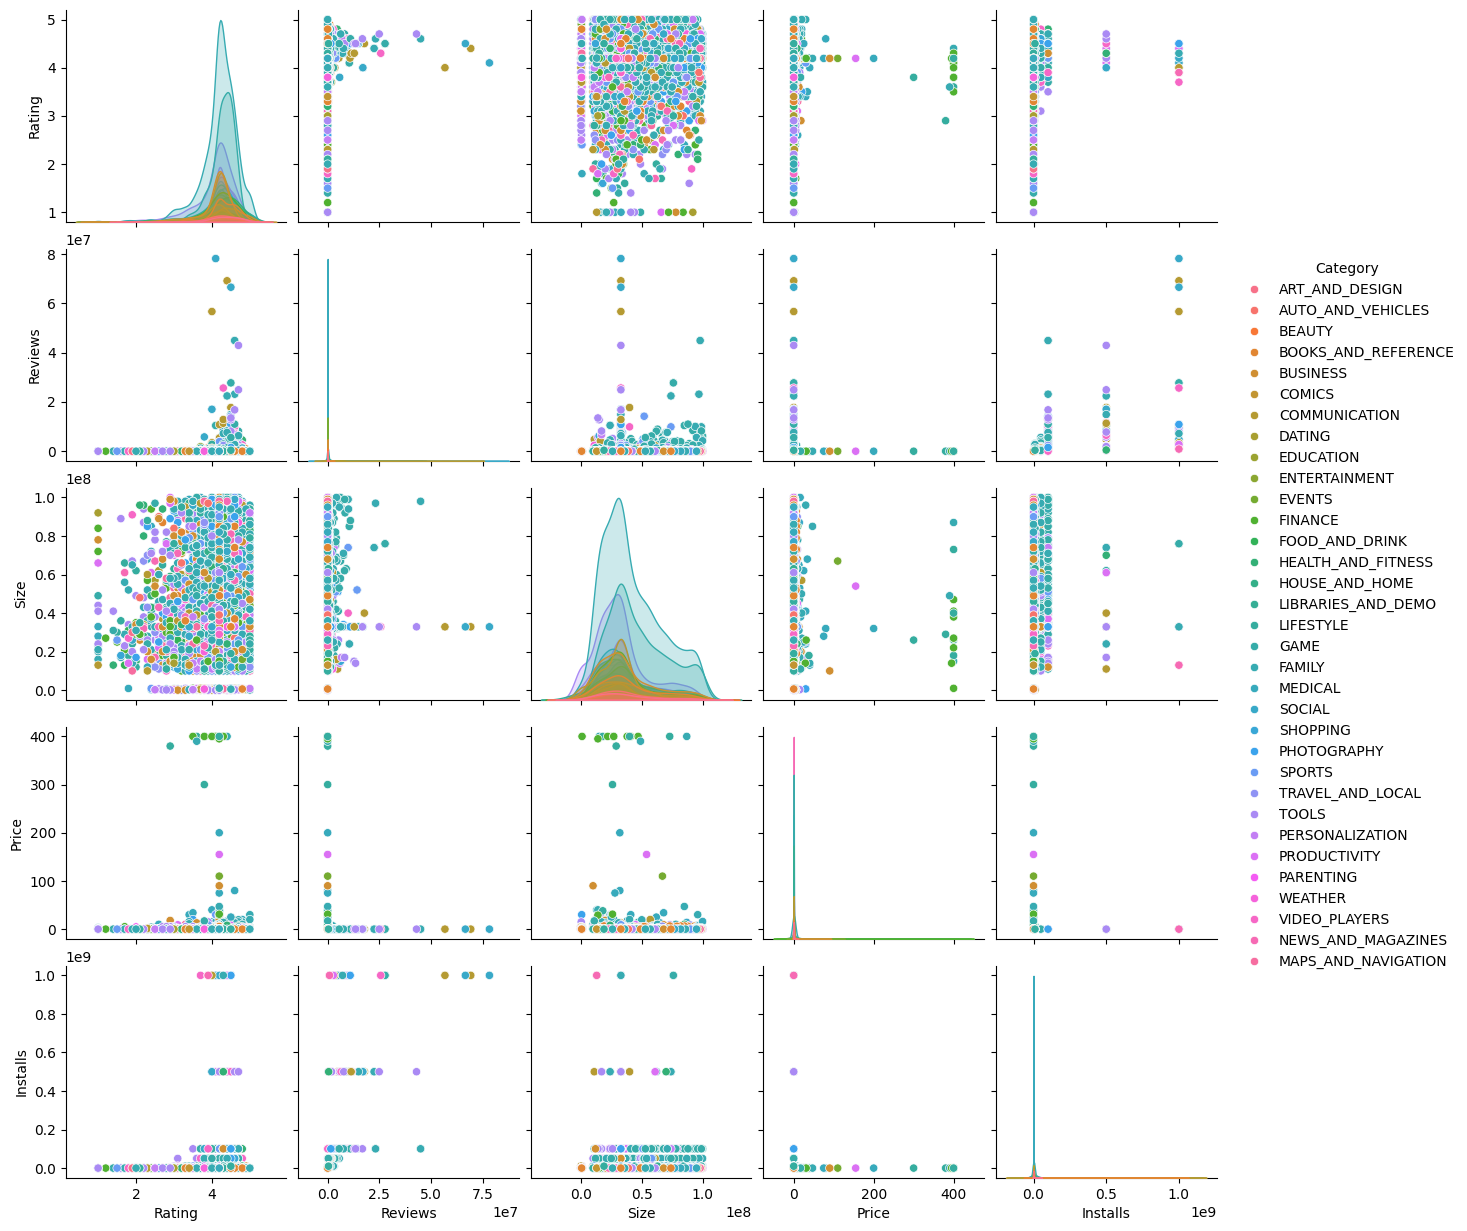

In [25]:
sns.pairplot(apps, hue="Category")

In [26]:
df.to_csv("googleplaystore_cleaned.csv", index=False)

In [27]:
df = pd.read_csv("googleplaystore_cleaned.csv")

In [28]:
df = df.loc[df["Installs"] <= 1_000_000]

In [29]:
import matplotlib.pyplot as plt

In [30]:
category_counts = df["Category"].value_counts()
category_counts

Category
FAMILY                 1581
TOOLS                   655
GAME                    571
MEDICAL                 406
BUSINESS                387
LIFESTYLE               330
FINANCE                 314
PERSONALIZATION         312
PRODUCTIVITY            283
SPORTS                  254
HEALTH_AND_FITNESS      234
NEWS_AND_MAGAZINES      221
COMMUNICATION           220
BOOKS_AND_REFERENCE     190
DATING                  176
SOCIAL                  173
TRAVEL_AND_LOCAL        166
PHOTOGRAPHY             161
SHOPPING                133
VIDEO_PLAYERS           113
MAPS_AND_NAVIGATION     103
FOOD_AND_DRINK           96
EDUCATION                92
AUTO_AND_VEHICLES        80
LIBRARIES_AND_DEMO       79
HOUSE_AND_HOME           68
EVENTS                   62
PARENTING                58
WEATHER                  58
ART_AND_DESIGN           57
ENTERTAINMENT            54
COMICS                   54
BEAUTY                   51
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'TOOLS'),
  Text(2, 0, 'GAME'),
  Text(3, 0, 'MEDICAL'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'LIFESTYLE'),
  Text(6, 0, 'FINANCE'),
  Text(7, 0, 'PERSONALIZATION'),
  Text(8, 0, 'PRODUCTIVITY'),
  Text(9, 0, 'SPORTS'),
  Text(10, 0, 'HEALTH_AND_FITNESS'),
  Text(11, 0, 'NEWS_AND_MAGAZINES'),
  Text(12, 0, 'COMMUNICATION'),
  Text(13, 0, 'BOOKS_AND_REFERENCE'),
  Text(14, 0, 'DATING'),
  Text(15, 0, 'SOCIAL'),
  Text(16, 0, 'TRAVEL_AND_LOCAL'),
  Text(17, 0, 'PHOTOGRAPHY'),
  Text(18, 0, 'SHOPPING'),
  Text(19, 0, 'VIDEO_PLAYERS'),
  Text(20, 0, 'MAPS_AND_NAVIGATION'),
  Text(21, 0, 'FOOD_AND_DRINK'),
  Text(22, 0, 'EDUCATION'),
  Text(23, 0, 'AUTO_AND_VEHICLES'),
  Text(24, 0, 'LIBRARIES_AND_DEMO'),
  Text(25, 0, 'HOUSE_AND_HOME'),
  Text(26, 0, 'EVENTS'),
  Te

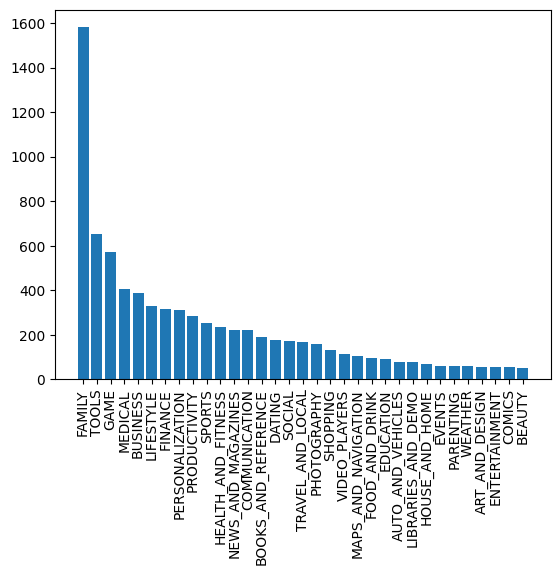

In [31]:
plt.bar(category_counts.index, category_counts.values)
plt.xticks(rotation=90)

Text(0, 0.5, 'Frequency')

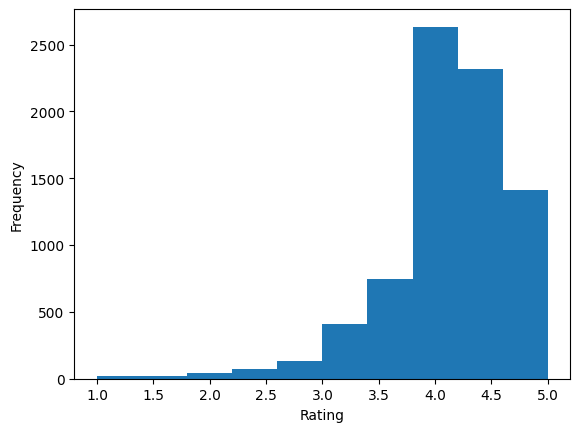

In [32]:
plt.hist(df["Rating"], bins=10)
plt.xlabel("Rating")
plt.ylabel("Frequency")

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

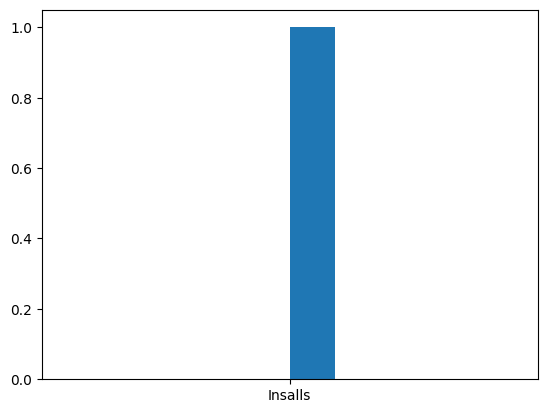

In [33]:
plt.hist("Insalls", bins=10)

(array([7.352e+03, 3.020e+02, 8.700e+01, 2.400e+01, 1.200e+01, 7.000e+00,
        5.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([     0. ,  37622.3,  75244.6, 112866.9, 150489.2, 188111.5,
        225733.8, 263356.1, 300978.4, 338600.7, 376223. ]),
 <BarContainer object of 10 artists>)

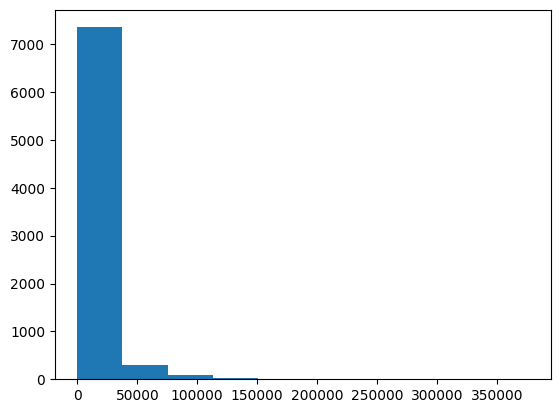

In [34]:
plt.hist(df["Reviews"], bins=10)

In [35]:
summury_stats = df[["Category", "Rating", "Reviews", "Size", "Price", "Last Updated", "Installs"]].describe()
summury_stats

,Rating,Reviews,Size,Price,Installs
count,7792.000000,7792.000000,7.792000e+03,7791.000000,7792.000000
mean,4.148067,7586.834831,3.728989e+07,1.368378,243443.984471
std,0.529354,20840.614148,2.369671e+07,18.756572,387198.623335
min,1.000000,0.000000,1.100000e+04,0.000000,0.000000
25%,4.000000,12.000000,1.900000e+07,0.000000,1000.000000
50%,4.193338,226.000000,3.287447e+07,0.000000,10000.000000
75%,4.500000,4354.250000,5.000000e+07,0.000000,500000.000000
max,5.000000,376223.000000,1.000000e+08,400.000000,1000000.000000


## Задание 3
- найти выбросы
- удаление и винсоризация выбросов
- стандартизация данных

In [36]:
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn  import preprocessing
from sklearn.preprocessing import StandardScaler

In [37]:
z_scores = stats.zscore(df["Installs"])
threshold = 3
outliers = df["Installs"][z_scores > threshold]
df.loc[z_scores > threshold, "Installs"] = df["Installs"].mean() # replace outliers with mean

/tmp/ipykernel_19608/2244955007.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '243443.98447125257' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[z_scores > threshold, "Installs"] = df["Installs"].mean() # replace outliers with mean


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

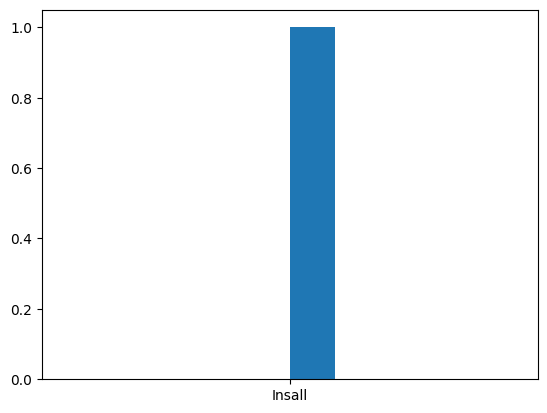

In [38]:
plt.hist("Insall")

In [39]:
z_scores = stats.zscore(df["Reviews"])
threshold = 3
outliers = df["Reviews"][z_scores > threshold]
df.loc[z_scores > threshold, "Reviews"] = df["Reviews"].mean()

/tmp/ipykernel_19608/3457832058.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7586.834830595482' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[z_scores > threshold, "Reviews"] = df["Reviews"].mean()


In [40]:
reviews_df = df.loc[df["Reviews"] <= 1_000_000] # remove outliers

(array([6156.,  654.,  289.,  211.,  155.,  111.,   73.,   51.,   51.,
          41.]),
 array([    0. ,  6997.3, 13994.6, 20991.9, 27989.2, 34986.5, 41983.8,
        48981.1, 55978.4, 62975.7, 69973. ]),
 <BarContainer object of 10 artists>)

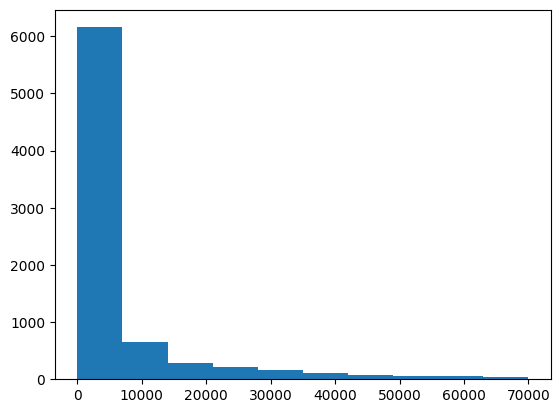

In [41]:
plt.hist(reviews_df["Reviews"])

In [42]:
df["Ratiing"] = winsorize(df["Rating"], limits=[0.1, 0.1])

(array([  17.,   18.,   40.,   73.,  131.,  406.,  745., 2633., 2318.,
        1411.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

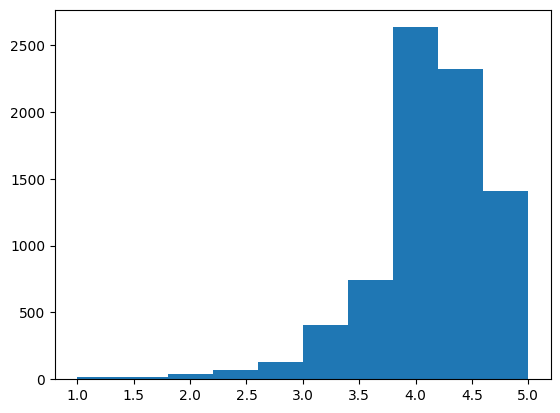

In [43]:
plt.hist(reviews_df["Rating"])

In [45]:
scaler = StandardScaler() # standardize the data
df["Raing"] = scaler.fit_transform(df["Rating"].values.reshape(-1, 1))

(array([  17.,   18.,   40.,   73.,  131.,  406.,  745., 2633., 2318.,
        1411.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

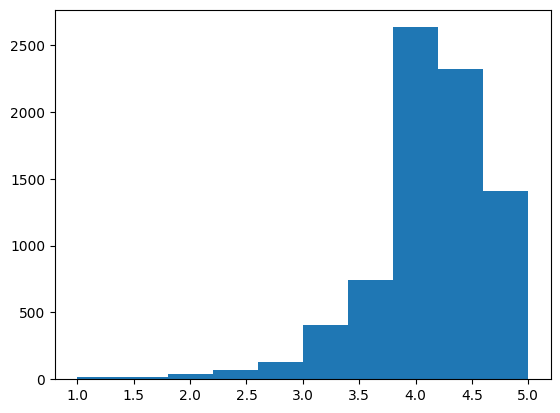

In [47]:
plt.hist(reviews_df["Rating"])

## Задание 4
- label encoding к столбцу Type с помощью класса LabelEncoder from sklean.preprocessing import LabelEncoder. Создать столбец Type_Encoded
- one-hot encoding к столбцу Content Rating с помощью метода get_dummies from pandas. Используйте параметр columns, чтобы указать столбец для кодирования как Content Rating и установите параметр prefix d ContentRaing/ Задать параметр drop_first со значением True, чтобы отбросить первый загодированный столбец во избежание мультиколлинеарности.
- Создайте таблицу pivot с именем pivot_table для анализа средних оценок на основе категории приложения и рейтинга контента Teen/ Установите параметр index в Category, параметр columns в ContentRating_Teen, параметра values в Rating, ф параметр aggfunc в meanю

Выведите рузультирующую сводную таблицу.

In [48]:
from sklearn.preprocessing import LabelEncoder

In [50]:
df = pd.read_csv("googleplaystore_cleaned.csv")

In [52]:
le = LabelEncoder()
df["Type_Encoded"] = le.fit_transform(df["Type"]) # encode the "Type" column

In [53]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type_Encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0


In [54]:
df = pd.get_dummies(df, columns=["Content Rating"], prefix="ContentRating", drop_first=True) # encode the "Content Rating" column

In [55]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Genres,Last Updated,Current Ver,Android Ver,Type_Encoded,ContentRating_Everyone,ContentRating_Everyone 10+,ContentRating_Mature 17+,ContentRating_Teen,ContentRating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0,True,False,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0,True,False,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87000000.0,5000000,Free,0.0,Art & Design,2018-08-01,1.2.4,4.0.3 and up,0,True,False,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Art & Design,2018-06-08,Varies with device,4.2 and up,0,False,False,False,True,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,28000000.0,100000,Free,0.0,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,0,True,False,False,False,False


In [57]:
pivot_table = df.pivot_table(index="Category", columns="ContentRating_Teen", values="Rating", aggfunc="mean")
pivot_table

ContentRating_Teen,False,True
Category,,
ART_AND_DESIGN,4.306032,4.466667
AUTO_AND_VEHICLES,4.190715,4.200000
BEAUTY,4.272668,4.064446
BOOKS_AND_REFERENCE,4.313175,4.299683
BUSINESS,4.133126,4.226157
COMICS,4.228597,4.031818
COMMUNICATION,4.146747,4.282152
DATING,4.008030,4.116003
EDUCATION,4.371266,4.800000
